In [2]:
# import pandas as pd
# df = pd.read_excel("final_dataset_limited_600_per_category.xlsx")

In [14]:
import pandas as pd
df = pd.read_excel("parsed_data_new_balanced.xlsx")

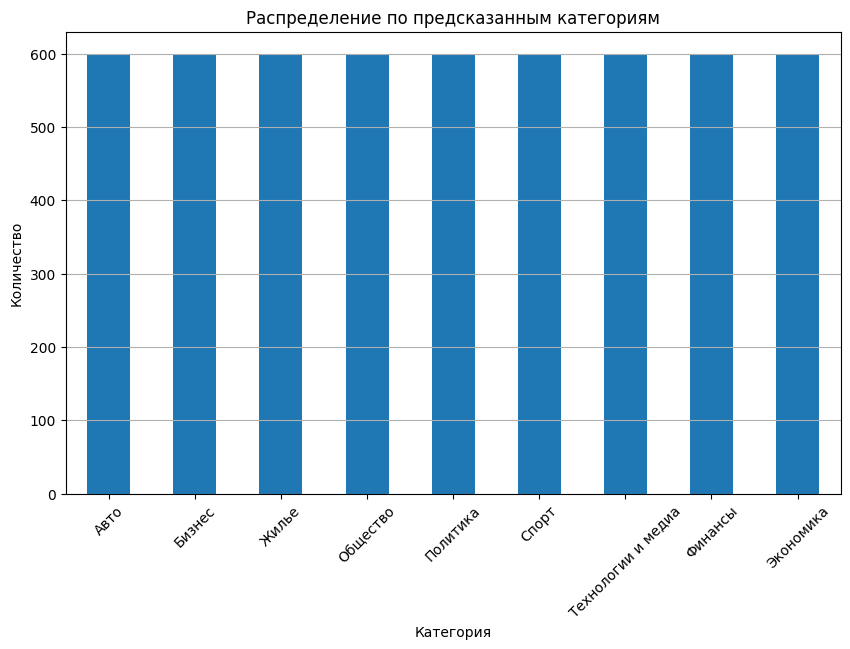

In [ ]:
# import matplotlib.pyplot as plt

# category_counts = df["category"].value_counts()

# plt.figure(figsize=(10, 6))
# category_counts.plot(kind='bar')
# plt.xlabel("Категория")
# plt.ylabel("Количество")
# plt.title("Распределение по предсказанным категориям")
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

In [ ]:
# unique_projects = df['category'].unique()

# print("Уникальные значения в колонке project_nik:")
# for value in unique_projects:
#     print(value)

Уникальные значения в колонке project_nik:
Авто
Бизнес
Жилье
Общество
Политика
Спорт
Технологии и медиа
Финансы
Экономика


In [ ]:
# average_word_count = df["text"].astype(str).apply(lambda x: len(x.split())).mean()
# print(f"Среднее количество слов: {average_word_count:.2f}")

Среднее количество слов: 427.04


In [ ]:
# df.head()

,project,type,category,title,publish_date,fronturl,picture,overview,text,word_count
0,РБК,short_news,Авто,Глава АвтоВАЗа заявил о снижении продаж в феврале,2025-02-25T22:18:33+03:00,https://www.rbc.ru/rbcfreenews/67be10c59a79474...,1,NaN,В феврале 2025 года концерн АвтоВАЗ ожидает сн...,304
1,РБК,short_news,Авто,Юрист напомнил о штрафах за мытье машины на да...,2025-03-23T10:32:08+03:00,https://www.rbc.ru/rbcfreenews/67dfb71e9a79479...,1,NaN,Сотрудники ГИБДД могут оштрафовать автомобилис...,290
2,РБК,short_news,Авто,Минпромторг представил список облагаемых налог...,2025-03-29T19:43:30+03:00,https://www.rbc.ru/rbcfreenews/67e81d279a7947d...,1,В первый список внесены 303 модели средней сто...,Минпромторг России составил список дорогостоящ...,333
3,Autonews,short_news,Авто,В России стартовали продажи Volkswagen Golf. Н...,2025-01-06T22:51:30+03:00,https://www.autonews.ru/news/677bdc9b9a7947668...,1,NaN,В России возобновили продажи новых хэтчбеков V...,175
4,Autonews,short_news,Авто,В России назвали самые популярные пикапы. Цены...,2025-01-06T15:11:35+03:00,https://www.autonews.ru/news/677bc85d9a7947904...,1,NaN,"В России резко вырос спрос на пикапы. Так, по ...",403


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['text'].fillna('').tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
feature_array = vectorizer.get_feature_names_out()

new_texts = []
for i in range(len(texts)):
    tfidf_scores = X[i].toarray().flatten()
    topn_indices = tfidf_scores.argsort()[::-1][:56]
    top_words = [feature_array[j] for j in topn_indices]
    new_texts.append(' '.join(top_words))

df_modified = df.copy()
df_modified['text'] = new_texts


print(df_modified[['title', 'text']].head(3))

                                               title  \
0  Глава АвтоВАЗа заявил о снижении продаж в феврале   
1  Юрист напомнил о штрафах за мытье машины на да...   
2  Минпромторг представил список облагаемых налог...   

                                                text  
0  соколов тыс складах продажи автоваза года авто...  
1  мытье тишаков гигиенических норм нарушение ст ...  
2  стоимостью перечень млн налога maserati aston ...  


In [ ]:
# df_modified.head()

,project,type,category,title,publish_date,fronturl,picture,overview,text,word_count
0,РБК,short_news,Авто,Глава АвтоВАЗа заявил о снижении продаж в феврале,2025-02-25T22:18:33+03:00,https://www.rbc.ru/rbcfreenews/67be10c59a79474...,1,NaN,соколов тыс складах автоваза автоваз автомобил...,304
1,РБК,short_news,Авто,Юрист напомнил о штрафах за мытье машины на да...,2025-03-23T10:32:08+03:00,https://www.rbc.ru/rbcfreenews/67dfb71e9a79479...,1,NaN,мытье тишаков норм гигиенических нарушение ст ...,290
2,РБК,short_news,Авто,Минпромторг представил список облагаемых налог...,2025-03-29T19:43:30+03:00,https://www.rbc.ru/rbcfreenews/67e81d279a7947d...,1,В первый список внесены 303 модели средней сто...,стоимостью перечень роскошь млн налога maserat...,333
3,Autonews,short_news,Авто,В России стартовали продажи Volkswagen Golf. Н...,2025-01-06T22:51:30+03:00,https://www.autonews.ru/news/677bdc9b9a7947668...,1,NaN,golf volkswagen хэтчбеков модели параллельного...,175
4,Autonews,short_news,Авто,В России назвали самые популярные пикапы. Цены...,2025-01-06T15:11:35+03:00,https://www.autonews.ru/news/677bc85d9a7947904...,1,NaN,ед пикап poer месяцев 11 kingkong двигателем у...,403


In [16]:
!pip install --upgrade --quiet catboost openpyxl scikit-learn joblib

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
import time
import joblib

In [18]:
df_modified = df_modified.dropna(subset=["title", "text", "category"])

print("Пример объединённого текста и количества слов:")
df_modified[["text"]].head()

Пример объединённого текста и количества слов:


,text
0,соколов тыс складах продажи автоваза года авто...
1,мытье тишаков гигиенических норм нарушение ст ...
2,стоимостью перечень млн налога maserati aston ...
3,golf volkswagen хэтчбеков всякром парктронника...
4,ед пикап poer месяцев 11 kingkong на пикапы дв...


In [19]:
y = df_modified["category"]

vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    stop_words=None
)

X_tfidf = vectorizer.fit_transform(df_modified["text"].astype(str)).toarray()

X = np.hstack([X_tfidf])

print(f"Форма матрицы признаков: {X.shape}")

Форма матрицы признаков: (25151, 5000)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (12575, 5000)
Размер тестовой выборки: (12576, 5000)


In [21]:
#Классификация с CatBoost
model = CatBoostClassifier(
    iterations=1500,
    depth=10,
    learning_rate=0.03,
    loss_function='MultiClass',
    task_type='GPU',
    devices='0',
    verbose=100
)

model.fit(X_train, y_train)

0:	learn: 2.1613334	total: 744ms	remaining: 18m 35s
100:	learn: 1.4134446	total: 1m 1s	remaining: 14m 16s
200:	learn: 1.2230091	total: 2m	remaining: 13m 1s
300:	learn: 1.1071614	total: 3m	remaining: 11m 57s
400:	learn: 1.0288631	total: 3m 58s	remaining: 10m 54s
500:	learn: 0.9696796	total: 4m 57s	remaining: 9m 52s
600:	learn: 0.9235634	total: 5m 55s	remaining: 8m 51s
700:	learn: 0.8850662	total: 6m 54s	remaining: 7m 52s
800:	learn: 0.8532370	total: 7m 52s	remaining: 6m 52s
900:	learn: 0.8270715	total: 8m 50s	remaining: 5m 52s
1000:	learn: 0.8036748	total: 9m 48s	remaining: 4m 53s
1100:	learn: 0.7816294	total: 10m 46s	remaining: 3m 54s
1200:	learn: 0.7628936	total: 11m 44s	remaining: 2m 55s
1300:	learn: 0.7466269	total: 12m 43s	remaining: 1m 56s
1400:	learn: 0.7320770	total: 13m 41s	remaining: 58s
1499:	learn: 0.7182537	total: 14m 38s	remaining: 0us


In [22]:
model.save_model("catboost_news_classifier_1-8.cbm")
joblib.dump(vectorizer, "tfidf_vectorizer_1-6.pkl")

['tfidf_vectorizer_1-6.pkl']

In [23]:
y_pred = model.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

              Авто       0.91      0.86      0.89      1750
            Бизнес       0.57      0.71      0.63      1810
             Жилье       0.93      0.82      0.87       739
          Общество       0.62      0.76      0.68      1742
          Политика       0.77      0.77      0.77      2000
             Спорт       0.98      0.89      0.93      1125
Технологии и медиа       0.80      0.65      0.72      1237
           Финансы       0.78      0.69      0.73       913
         Экономика       0.67      0.56      0.61      1260

          accuracy                           0.75     12576
         macro avg       0.78      0.75      0.76     12576
      weighted avg       0.76      0.75      0.75     12576



In [24]:
import pandas as pd
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-8.cbm")
tfidf = joblib.load("tfidf_vectorizer_1-6.pkl")

dff = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")

dff["text"] = dff["text"].fillna("")

X_text = tfidf.transform(dff["text"])

preds = model.predict(X_text)

dff["predicted_category"] = preds.ravel()
#df.to_excel("rbc_predictions_no_wordcount.xlsx", index=False)

In [25]:
dff.head()

,date,text,link,picture,video,word_count,predicted_category
0,2025-05-08 07:54:01,"Аэропорты Москвы — Шереметьево, Внуково, Домод...",https://t.me/rbc_news/117689,0,0,52,Общество
1,2025-05-08 07:36:28,"Си Цзиньпин заявил, что 80 лет назад «китайски...",https://t.me/rbc_news/117688,0,0,72,Спорт
2,2025-05-08 07:27:13,"Путин сказал, что будет рад «вновь посетить др...",https://t.me/rbc_news/117687,0,1,28,Бизнес
3,2025-05-08 07:18:55,В Кремле началась встреча Путина и Си Цзиньпин...,https://t.me/rbc_news/117686,0,1,16,Общество
4,2025-05-08 07:11:21,Истребители Индии и Пакистана сразились в возд...,https://t.me/rbc_news/117685,1,0,152,Бизнес


In [26]:
dff.to_excel("rbc_predictions_no_wordcount.xlsx", index=False)

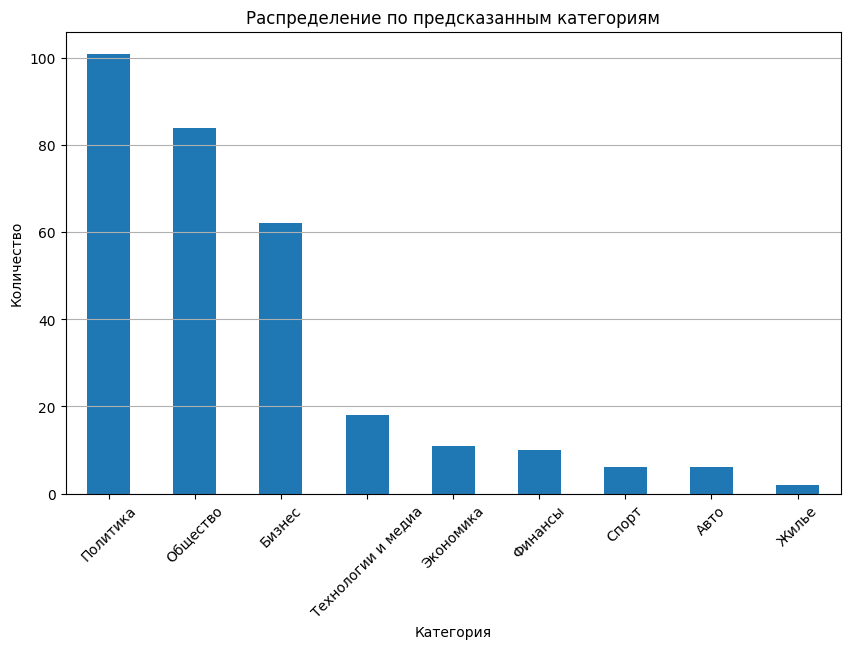

In [27]:
import matplotlib.pyplot as plt

category_counts = dff["predicted_category"].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.title("Распределение по предсказанным категориям")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [28]:
dff_1 = pd.read_excel("rbc_predictions_no_wordcount.xlsx")

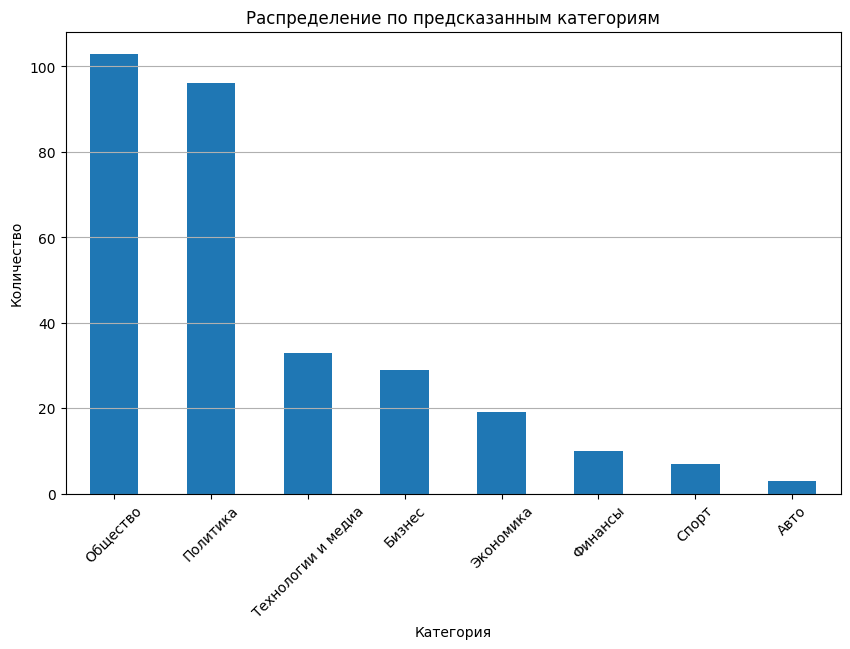

In [29]:
import matplotlib.pyplot as plt

category_counts = dff_1["predicted_category"].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.title("Распределение по предсказанным категориям")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()